In [143]:
import pandas as pd
import os

In [144]:
pwd = os.getcwd()

In [145]:
mb = pd.read_csv(pwd + '/Data - Map Banned.csv', usecols=['Map','Total']).iloc[1:]
mp = pd.read_csv(pwd + '/Data - Map Picked.csv', usecols=['Map','Total'])
ss = pd.read_csv(pwd + '/Data - Side Statistics.csv')


In [146]:
mb

,Map,Total
1,Ascent,18
2,Bind,15
3,Fracture,29
4,Haven,22
5,Lotus,18
6,Pearl,18
7,Split,12


In [147]:
mp

,Map,Total
0,Ascent,16
1,Bind,19
2,Fracture,5
3,Haven,12
4,Lotus,16
5,Pearl,16
6,Split,22


In [148]:
ss

,Map,Atk Wins,Def Wins
0,Ascent,145,138
1,Bind,157,183
2,Fracture,51,53
3,Haven,107,109
4,Lotus,151,123
5,Pearl,149,151
6,Split,178,138


In [149]:
map_data = pd.merge(mp,mb, on='Map')
map_data = pd.merge(map_data,ss, on='Map')
map_data

,Map,Total_x,Total_y,Atk Wins,Def Wins
0,Ascent,16,18,145,138
1,Bind,19,15,157,183
2,Fracture,5,29,51,53
3,Haven,12,22,107,109
4,Lotus,16,18,151,123
5,Pearl,16,18,149,151
6,Split,22,12,178,138


In [150]:
map_data=map_data.rename(columns={'Total_x': 'Picked','Total_y':'Banned'})
map_data

,Map,Picked,Banned,Atk Wins,Def Wins
0,Ascent,16,18,145,138
1,Bind,19,15,157,183
2,Fracture,5,29,51,53
3,Haven,12,22,107,109
4,Lotus,16,18,151,123
5,Pearl,16,18,149,151
6,Split,22,12,178,138


In [151]:
map_data.describe()

,Picked,Banned,Atk Wins,Def Wins
count,7.000000,7.000000,7.000000,7.000000
mean,15.142857,18.857143,134.000000,127.857143
std,5.429198,5.429198,42.265037,40.341990
min,5.000000,12.000000,51.000000,53.000000
25%,14.000000,16.500000,126.000000,116.000000
50%,16.000000,18.000000,149.000000,138.000000
75%,17.500000,20.000000,154.000000,144.500000
max,22.000000,29.000000,178.000000,183.000000


In [152]:
import matplotlib.pyplot as plt
import seaborn as sns

/Users/davidantwi/miniconda3/envs/datascience/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/davidantwi/miniconda3/envs/datascience/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/davidantwi/miniconda3/envs/datascience/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


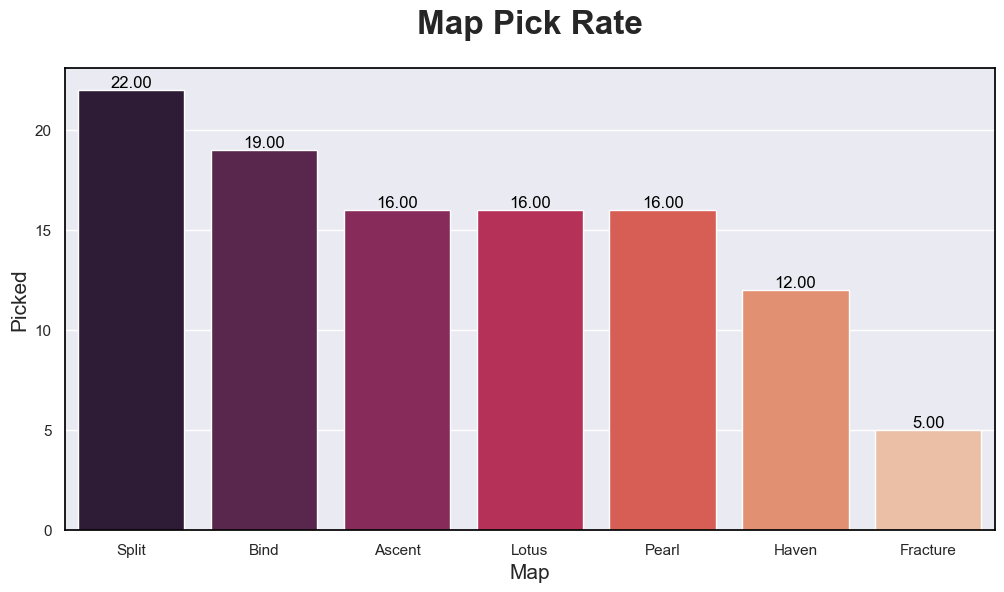

        Map  Picked
0     Split      22
1      Bind      19
2    Ascent      16
3     Lotus      16
4     Pearl      16
5     Haven      12
6  Fracture       5


In [153]:
plt.figure(figsize=(12,6))

custom = {"axes.edgecolor": "BLACK",}
sns.set_style('darkgrid',custom)
ax =  sns.barplot(data= map_data.sort_values(by='Picked',ascending=False),
            x='Map',y='Picked', width=.8, palette= 'rocket')


plt.title('Map Pick Rate', pad=25, weight= 'bold', fontsize= 24)
plt.xlabel('Map', size=15)
plt.ylabel('Picked', size=15)

for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom', color='black')

plt.savefig('map picked.jpg')
plt.show()
picked_map = (map_data[['Map','Picked']].sort_values(by='Picked', 
                        ascending=False).reset_index(drop=True))

print(picked_map)

/Users/davidantwi/miniconda3/envs/datascience/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/davidantwi/miniconda3/envs/datascience/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/davidantwi/miniconda3/envs/datascience/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


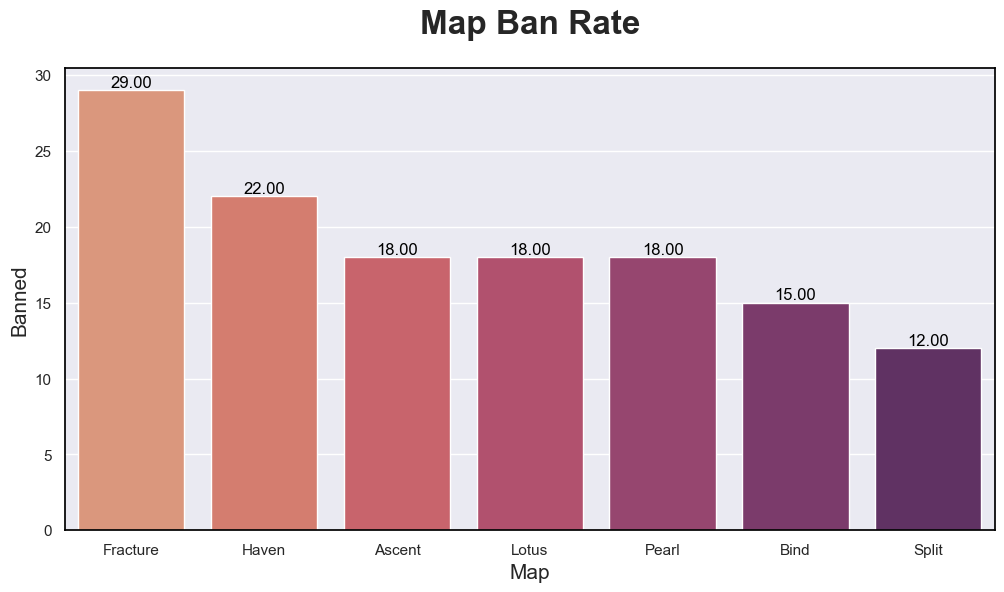

        Map  Banned
0  Fracture      29
1     Haven      22
2    Ascent      18
3     Lotus      18
4     Pearl      18
5      Bind      15
6     Split      12


In [154]:
plt.figure(figsize=(12,6))
custom = {"axes.edgecolor": "BLACK",}
sns.set_style('darkgrid',custom)
ax = sns.barplot(data= map_data.sort_values(by='Banned', ascending=False),
            x='Map',y='Banned', width=.8, palette= 'flare')


plt.title('Map Ban Rate', pad=25, weight= 'bold', fontsize= 24)
plt.xlabel('Map', size=15)
plt.ylabel('Banned', size=15)


for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom', color='black')

plt.savefig('map banned.jpg')                                                
plt.show()
banned_map = (map_data[['Map','Banned']].sort_values(by='Banned', 
                        ascending=False).reset_index(drop=True))

print(banned_map)

In [155]:
ss

,Map,Atk Wins,Def Wins
0,Ascent,145,138
1,Bind,157,183
2,Fracture,51,53
3,Haven,107,109
4,Lotus,151,123
5,Pearl,149,151
6,Split,178,138


/Users/davidantwi/miniconda3/envs/datascience/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/davidantwi/miniconda3/envs/datascience/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/davidantwi/miniconda3/envs/datascience/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/davidantwi/miniconda3/envs/datascience/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype

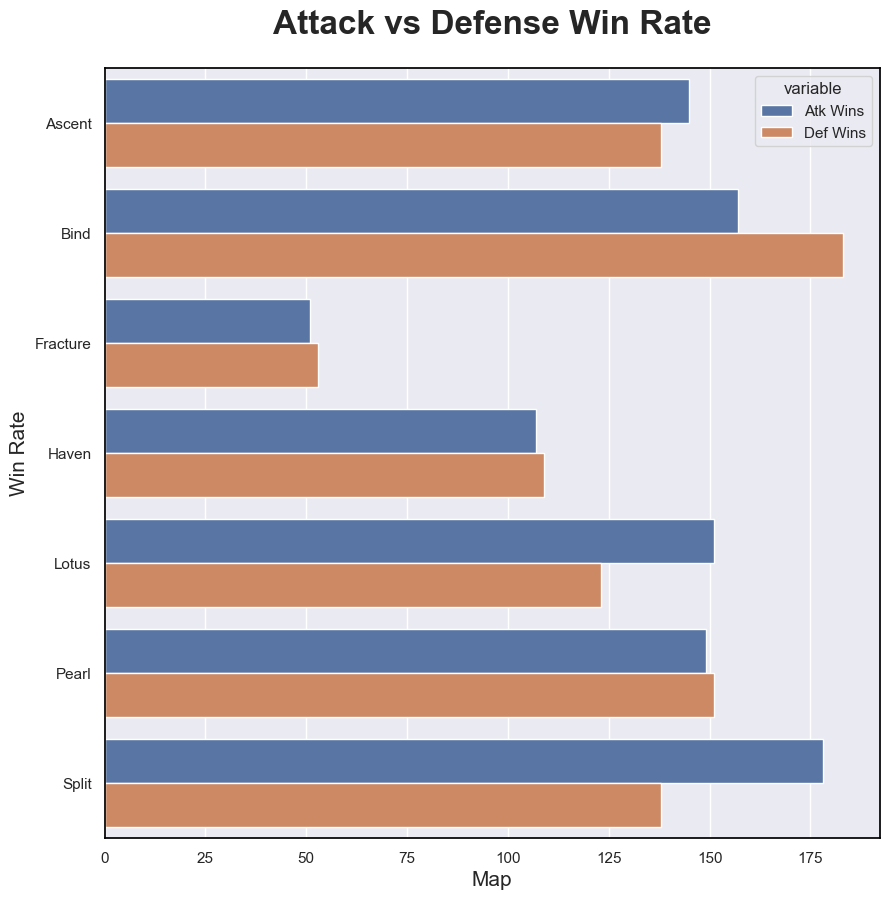

In [184]:
ss_melt = ss.melt(id_vars=['Map'], value_vars=['Atk Wins', 'Def Wins'])

plt.figure(figsize=(10,10))
custom = {"axes.edgecolor": "BLACK",}
sns.set_style('darkgrid',custom)
ax = sns.barplot(data=ss_melt, x='value', y='Map', hue='variable', width=.8)


plt.title('Attack vs Defense Win Rate', pad=25, weight= 'bold', fontsize= 24)
plt.xlabel('Map', size=15)
plt.ylabel('Win Rate', size=15)


plt.savefig('win rate.jpg')                                                
plt.show()

In [158]:
ps = pd.read_csv(pwd + '/Edited Data - Player Statistics.csv')
ps.head()

,Player,Country,Team,Maps,K,D,A,KD,KDA,ACS/Map,K/Map,D/Map,A/Map,Agent 1,Agent 2,Agent 3
0,Keznit,Chile,KRÜ Esports,4,79,70,21,1.12,1.42,266,19.7,17.5,5.2,Raze,Jett,NaN
1,Whz,China,Bilibili Gaming,11,212,181,41,1.17,1.39,254,19.2,16.4,3.7,Raze,Jett,NaN
2,Demon1,United States,Evil Geniuses,21,421,302,80,1.39,1.65,246,20.0,14.3,3.8,Jett,Astra,Chamber
3,Aspas,Brazil,LOUD,24,446,355,82,1.25,1.48,235,18.5,14.7,3.4,Raze,Jett,NaN
4,Jinggg,Singapore,Paper Rex,16,285,279,92,1.02,1.35,234,17.8,17.4,5.7,Raze,Phoenix,NaN
